# Phishing URL Detection

## Introduction

### Relevant Background Information

Phishing is a cybercrime that baits unknowing victims into clicking on URLs. This is done by acting like an authentic institution while contacting the victim through emails, texts, or other social media. Phishing assaults nowadays are advanced and progressively more troublesome to spot; additionally, as we rely more on our online profiles, phishing emails that take our sensitive information become more and more dangerous. Not only are phishing assaults dangerous to individuals, but they are also dangerous to huge corporations. For instance, one of the most extraordinary Phishing attacks includes the Colonial Pipeline scam, where over 3.4 billion euros were scammed out of the company. The attack was constructed by a simple email that gained access to passwords and planted malicious software onto the company network system. This caused the company to shut down and the oil prices to skyrocket. The seriousness and dangers of phishing can lead to extreme damage and have tragic consequences, so more sophisticated methods of systems are required to prevent phishing. To counteract the dangers of phishing, our group will classify URLs as 'phishing' or 'legitimate' to warn victims before the attackers steal their sensitive information.

### Predictive Question

Can we classify an URL as phishing or legitimate?

### Dataset used to answer the Question

The dataset used in this project comes from: https://data.mendeley.com/datasets/c2gw7fy2j4/3/files/575316f4-ee1d-453e-a04f-7b950915b61b

The dataset is used by the article <a href="https://www.sciencedirect.com/science/article/pii/S0952197621001950#">Towards benchmark datasets for machine learning based website phishing detection: An experimental study</a> which can be found in the <a href="https://www.sciencedirect.com/journal/engineering-applications-of-artificial-intelligence">Engineering Applications of Artificial Intelligence journal</a>.

## Methods & Results

### Overview

### Housekeeping

We start by loading the required libraries into R to allow us to perform data analysis.

In [100]:
library(tidyverse)
library(repr)
library(tidymodels)

Now, we will set a seed to ensure that our results are reproducible.

In [101]:
set.seed(0717)

### Gathering Data

Next, we use ```read_csv``` to read the data into R. (Notably, the CSV file is not hosted for use on data.mendeley.com; therefore, I am hosting the CSV file on my own server.)

In [102]:
options(repr.matrix.max.rows = 5)
phishing_data <- read_csv("https://brianhan.tech/media/dsci/dataset_phishing.csv")

Rows: 11430 Columns: 89
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): url, status
dbl (87): length_url, length_hostname, ip, nb_dots, nb_hyphens, nb_at, nb_qm...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Forward Selection

This data contains a lot of predictors:

In [103]:
colnames(phishing_data)
ncol(phishing_data)

[1] "url"                        "length_url"                
 [3] "length_hostname"            "ip"                        
 [5] "nb_dots"                    "nb_hyphens"                
 [7] "nb_at"                      "nb_qm"                     
 [9] "nb_and"                     "nb_or"                     
[11] "nb_eq"                      "nb_underscore"             
[13] "nb_tilde"                   "nb_percent"                
[15] "nb_slash"                   "nb_star"                   
[17] "nb_colon"                   "nb_comma"                  
[19] "nb_semicolumn"              "nb_dollar"                 
[21] "nb_space"                   "nb_www"                    
[23] "nb_com"                     "nb_dslash"                 
[25] "http_in_path"               "https_token"               
[27] "ratio_digits_url"           "ratio_digits_host"         
[29] "punycode"                   "port"                      
[31] "tld_in_path"                "tld_in_subdomain"          
[33] "abnormal_subdomain"         "nb_subdomains"             
[35] "prefix_suffix"              "random_domain"             
[37] "shortening_service"         "path_extension"            
[39] "nb_redirection"             "nb_external_redirection"   
[41] "length_words_raw"           "char_repeat"               
[43] "shortest_words_raw"         "shortest_word_host"        
[45] "shortest_word_path"         "longest_words_raw"         
[47] "longest_word_host"          "longest_word_path"         
[49] "avg_words_raw"              "avg_word_host"             
[51] "avg_word_path"              "phish_hints"               
[53] "domain_in_brand"            "brand_in_subdomain"        
[55] "brand_in_path"              "suspecious_tld"            
[57] "statistical_report"         "nb_hyperlinks"             
[59] "ratio_intHyperlinks"        "ratio_extHyperlinks"       
[61] "ratio_nullHyperlinks"       "nb_extCSS"                 
[63] "ratio_intRedirection"       "ratio_extRedirection"      
[65] "ratio_intErrors"            "ratio_extErrors"           
[67] "login_form"                 "external_favicon"          
[69] "links_in_tags"              "submit_email"              
[71] "ratio_intMedia"             "ratio_extMedia"            
[73] "sfh"                        "iframe"                    
[75] "popup_window"               "safe_anchor"               
[77] "onmouseover"                "right_clic"                
[79] "empty_title"                "domain_in_title"           
[81] "domain_with_copyright"      "whois_registered_domain"   
[83] "domain_registration_length" "domain_age"                
[85] "web_traffic"                "dns_record"                
[87] "google_index"               "page_rank"                 
[89] "status"

[1] 89

Notably, a lot of predictors are not attainable through the URL alone. For instance, we can't know the ```google_index``` through the phishing URL alone (we would need another service). To answer the question: "Can we classify an URL as phishing or legitimate?" we will only select the predictors that can be directly obtained from the URL.

After filtering for predictors that are directly obtained from the URL, we will select the ones that we find important (Note: Ideally, we will perform forward selection on all of these variables; however, that would take ***way*** too long).

In [104]:
phishing_subset <- phishing_data |>
                   select(status, length_url, length_hostname, nb_dots, nb_hyphens, nb_at, nb_qm, nb_and, nb_or, nb_eq, nb_underscore, nb_tilde,
                          nb_percent, nb_slash, nb_star, nb_colon, nb_comma, nb_semicolumn, nb_dollar, nb_space, http_in_path, https_token, 
                          ratio_digits_url, ratio_digits_host, nb_subdomains,longest_word_host, longest_word_path, avg_words_raw, avg_word_host, 
                          domain_registration_length)
ncol(phishing_subset)

[1] 30

After selecting for slimming down the dataset to 30 columns, we will be performing forward selection. Credit for the code goes to <a href="https://datasciencebook.ca/classification2.html#forward-selection-in-r">datasciencebook.ca, Classification II: evaluation & tuning, 6.8.3 Forward Selection in R</a>.

```r
phishing_subset <- phishing_data |>
                   select(status, length_url, length_hostname, nb_dots, nb_hyphens, nb_at, nb_qm, nb_and, nb_or, nb_eq, nb_underscore, nb_tilde,
                          nb_percent, nb_slash, nb_star, nb_colon, nb_comma, nb_semicolumn, nb_dollar, nb_space, http_in_path, https_token, 
                          ratio_digits_url, ratio_digits_host, nb_subdomains,longest_word_host, longest_word_path, avg_words_raw, avg_word_host, 
                          domain_registration_length) %>%
                   mutate(https_token = as_factor(https_token))

names <- colnames(phishing_subset |> select(-status))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
phishing_vfold <- vfold_cv(phishing_subset, v = 5, strata = status)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("status", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        phishing_recipe <- recipe(as.formula(model_string), 
                                  data = phishing_subset) |>
                          step_scale(all_numeric_predictors()) |>
                          step_center(all_numeric_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
               add_recipe(phishing_recipe) |>
               add_model(knn_spec) |>
               tune_grid(resamples = phishing_vfold, grid = 10) |>
               collect_metrics() |>
               filter(.metric == "accuracy") |>
               summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
```

As the code takes a very long time to run, we have not included it in this file. The running of the code can be seen in the ```Topic Proposal.ipynb``` file, and we will load the results from the ```accuracies.csv``` file.

In [105]:
accuracies <- read_csv("accuracies.csv")
head(accuracies, 2)

Rows: 29 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): model_string
dbl (2): size, accuracy

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


size,model_string,accuracy
<dbl>,<chr>,<dbl>
1,status ~ longest_word_path,0.6675416
2,status ~ longest_word_path+domain_registration_length,0.7453193


By organizing the output from forward selection, we would find the predictors that are most useful in classifying an URL as phishing or legitimate. 

In [106]:
accuracies <- accuracies %>%
              arrange(desc(accuracy))
head(accuracies, 4)

size,model_string,accuracy
<dbl>,<chr>,<dbl>
16,status ~ longest_word_path+domain_registration_length+nb_hyphens+nb_slash+nb_dots+ratio_digits_url+length_hostname+avg_word_host+longest_word_host+length_url+nb_underscore+nb_at+ratio_digits_host+http_in_path+nb_semicolumn+nb_tilde,0.8597550
17,status ~ longest_word_path+domain_registration_length+nb_hyphens+nb_slash+nb_dots+ratio_digits_url+length_hostname+avg_word_host+longest_word_host+length_url+nb_underscore+nb_at+ratio_digits_host+http_in_path+nb_semicolumn+nb_tilde+nb_or,0.8597550
18,status ~ longest_word_path+domain_registration_length+nb_hyphens+nb_slash+nb_dots+ratio_digits_url+length_hostname+avg_word_host+longest_word_host+length_url+nb_underscore+nb_at+ratio_digits_host+http_in_path+nb_semicolumn+nb_tilde+nb_or+nb_dollar,0.8596675
19,status ~ longest_word_path+domain_registration_length+nb_hyphens+nb_slash+nb_dots+ratio_digits_url+length_hostname+avg_word_host+longest_word_host+length_url+nb_underscore+nb_at+ratio_digits_host+http_in_path+nb_semicolumn+nb_tilde+nb_or+nb_dollar+nb_star,0.8596675


Notably, the highest accuracy is a tie for 0.8597550. We chose to have fewer predictors (16) to decrease the number of computations our model requires.

### Clean Up and Splitting the Data

Now, we will clean up our data set by only selecting the relevant variables, which we found by performing the forward selection algorithm.

In [147]:
cleaned_phishing_data <- phishing_data %>%
                         select(status, longest_word_path, domain_registration_length, nb_hyphens, nb_slash, nb_dots, ratio_digits_url,
                                length_hostname, avg_word_host, longest_word_host, length_url, nb_underscore, nb_at, ratio_digits_host, http_in_path,
                                nb_semicolumn, nb_tilde) %>%
                         mutate(status = as_factor(status))

Continuing on, we will split the data into training and testing data sets with the proportion of 75% of the data for training and 25% of the data for testing. This allows us to get metrics on how well our model will do in the real world. 
<p style="color:red">Write More</p>

In [148]:
cleaned_phishing_data_split <- initial_split(cleaned_phishing_data, prop = 3/4, strata = status)
phishing_train <- training(cleaned_phishing_data_split)
phishing_test <- testing(cleaned_phishing_data_split)

### Exploring the Training Data

Check if there is imbalance

### Using 5-Fold Cross-Validation to get the Optimal Value of K (number of nearest neighbors)

Continuing on, we will scale 

In [149]:
phishing_recipe <- recipe(status ~ ., data = phishing_train) %>%
                   step_scale(all_predictors()) %>%
                   step_center(all_predictors())

Then, we use ```vfold_cv``` to splits our training data into 5 folds automatically.

In [150]:
phishing_vfold <- vfold_cv(phishing_train, v = 5, strata = status)

Using ```tune()```, R allows us to specify that we want to tune the parameter ```neighbors```.

In [151]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

We find the values of K we want to try by using ```seq()```.

In [152]:
k_vals <- tibble(neighbors = seq(from = 1, to = 5, by = 1))

Finally, we create a workflow to find the optimal value of K using the recipe, model, and our cross-validation settings we have created above.

In [158]:
knn_results <- workflow() %>%
               add_recipe(phishing_recipe) %>%
               add_model(knn_spec) %>%
               tune_grid(resamples = phishing_vfold, grid = k_vals) %>%
               collect_metrics()

By creating a plot of neighbors vs. accuracy estimate, we can find the optimal value of K (the number of neighbors with the highest accuracy estimate).

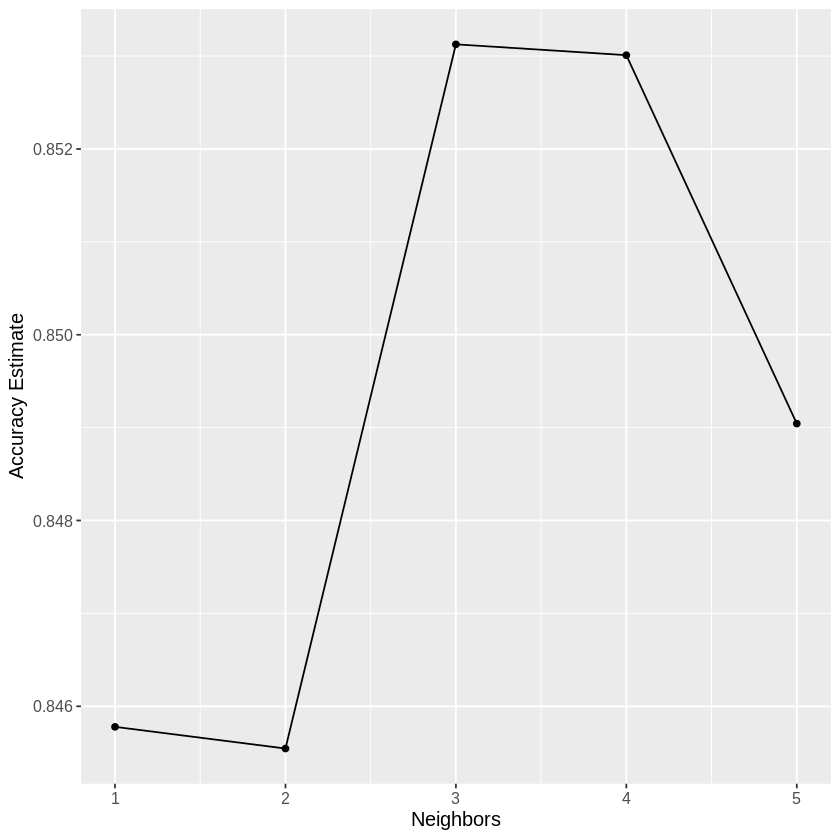

In [159]:
k_accuracies <- knn_results |>
                filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(k_accuracies, aes(x = neighbors, y = mean)) +
                 geom_point() +
                 geom_line() +
                 labs(x = "Neighbors", y = "Accuracy Estimate") + 
                 theme(text = element_text(size = 12))

accuracy_vs_k

### Creating the Actual Model

Now that we have organized the data and found the optimal value of ```K```, we can start creating the actual model.

To create the model, we start by creating a new model specification. This time, we will use the value of ```K``` we found through cross-validation instead of ```tune()```.

In [160]:
actual_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) %>%
                   set_engine("kknn") %>%
                   set_mode("classification")

Then, we will create a new workflow, fitted for the model, by utilizing the recipe we had built in the cross-validation step, and the new model specification we built using the optimal value of ```K``` found in the cross-validation step.

In [161]:
knn_fit <- workflow() %>%
           add_recipe(phishing_recipe) %>%
           add_model(actual_knn_spec) %>%
           fit(data = phishing_train)

### Testing the model and Analysis

To understand how well our model performs, we will be testing the model by using ```predict()``` and the testing data set we have set up during ‘Clean Up and Splitting the Data.’ We also use ```bind_cols``` to compare the predicted value and the actual value.

In [164]:
knn_predict <- knn_fit %>%
               predict(phishing_test) %>%
               bind_cols(phishing_test)

To see how well the model performs, we will get the RMSPE (Root Mean Squared Percentage Error) value by filtering for RMSE and selecting the ```.estimate``` column.

In [165]:
knn_rmpse <- knn_predict %>%
             metrics(truth = status, estimate = .pred_class) %>%
             filter(.metric == "accuracy")

knn_rmpse

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8589923


We can visualize the error by seeing the distribution of RMSPE. We can visualize this by doing a normal probability curve and a box plot.

[1] 2858

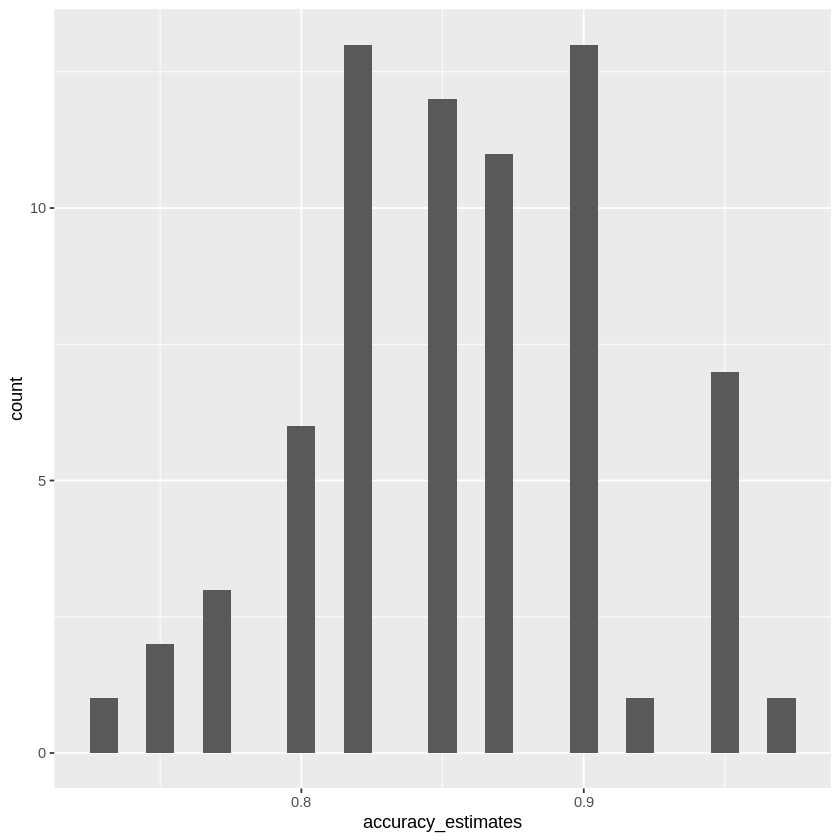

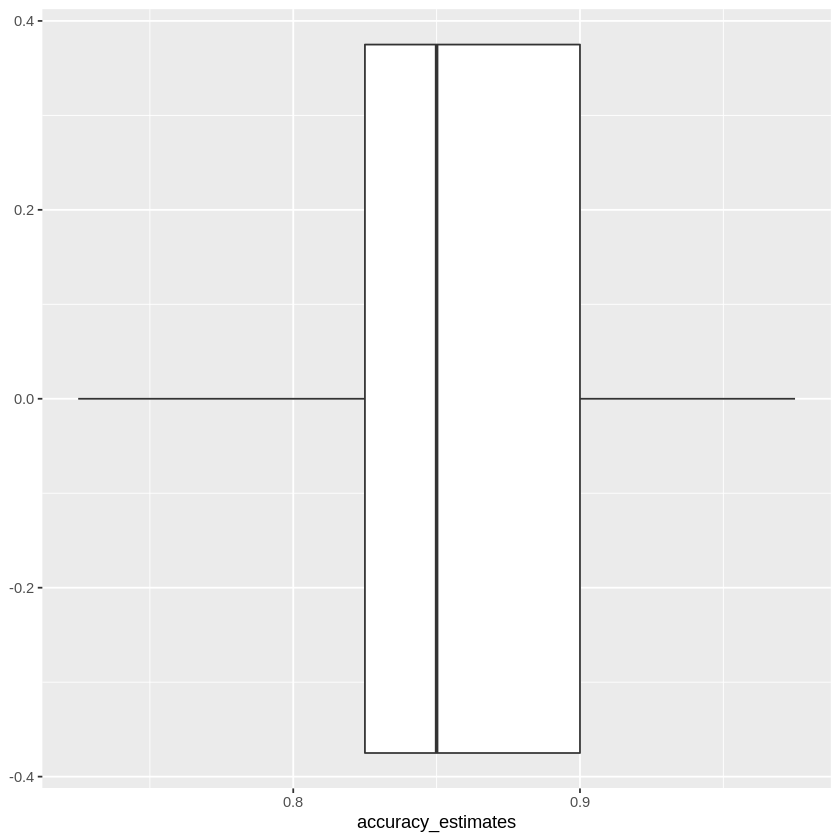

In [196]:
nrow(phishing_test)

phishing_test_samples <- rep_sample_n(phishing_test, size = 40, reps = 70)
accuracy_estimates = c()

for (i in 1:70) {
    current = filter(phishing_test_samples, replicate == i)
    
    sample_prediction <- knn_fit %>%
                         predict(current) %>%
                         bind_cols(current) %>%
                         metrics(truth = status, estimate = .pred_class) %>%
                         filter(.metric == "accuracy")
    
    accuracy_estimates <- c(accuracy_estimates, sample_prediction$.estimate)
}

accuracies_from_samples <- data.frame(accuracy_estimates)


accuracies_distribution <- accuracies_from_samples %>%
                           ggplot(aes(x = accuracy_estimates)) +
                               geom_histogram(binwidth = 0.01)


accuracies_boxplot <- accuracies_from_samples %>%
                      ggplot(aes(x = accuracy_estimates)) +
                          geom_boxplot()


accuracies_distribution
accuracies_boxplot

conf_mat

In [168]:
confusion_matrix <- knn_predict %>%
                    conf_mat(truth = status, estimate = .pred_class)

confusion_matrix

            Truth
Prediction   legitimate phishing
  legitimate       1253      227
  phishing          176     1202

## Discussion

## Works Cited